In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.tseries.offsets import BDay

#Dataset

Dataset was from Ecommerce Platform (***Not The Real One***). 
Evplenation for Dataset:

|variable                       |class     |description |
|:------------------------------|:---------|:-----------|
**order_detail:**
id 			|object| unique order code / id_order
customer_id 		|object|customer unique code
order_date 		|object| the date when the order was made
sku_id 			|object| product Unique Code (sku = stock keeping unit)
price			|int64| Product tag price
qty_ordered 		|int64| Quantity Ordered by Customer
before_discount	|float64| total price value of the product (price * qty_ordered)
discount_amount	|float64| total product discount value
after_discount		|float64| the total price value of the product when it has been reduced by discounts
is_gross 		|int64| indicates the customer has not paid for the order
is_valid		|int64| shows the customer has made a payment
is_net			|int64| indicates the transaction is complete
payment_id 		|int64| unique number of the payment method
||
**sku_detail:**
id |object| product Unique Code (sku = stock keeping unit)
sku_name 		|object| produt name
base_price		|float64| Product tag price
cogs 			|int64| cost of goods sold
category		|object| product category
||
**customer_detail:**
id 			|object| customer unique code
registered_date	|object| the date customers start registering as members
||
**payment_detail:**
id			|int64| unique number of the payment method
payment_method	|object| payment method used


In [2]:
#IMPORT Data Set with Pandas
df_od = pd.read_csv(r"I:\My Drive\MySkill Course\Final Project\Python_FinPro\order_detail.csv")
df_pd = pd.read_csv(r"I:\My Drive\MySkill Course\Final Project\Python_FinPro\payment_detail.csv")
df_cd = pd.read_csv(r"I:\My Drive\MySkill Course\Final Project\Python_FinPro\customer_detail.csv")
df_sd = pd.read_csv(r"I:\My Drive\MySkill Course\Final Project\Python_FinPro\sku_detail.csv")

displays the top 5 Data from the dataset

In [3]:
df_od.head(5)

,id,customer_id,order_date,sku_id,price,qty_ordered,before_discount,discount_amount,after_discount,is_gross,is_valid,is_net,payment_id
0,ODR9939707760w,C713589L,2021-11-19,P858068,26100,200,5220000.0,2610000.00,2610000.00,1,1,0,5
1,ODR7448356649d,C551551L,2021-11-19,P886455,1971942,5,9859710.0,2464927.50,7394782.50,1,0,0,5
2,ODR4011281866z,C685596L,2021-11-25,P678648,7482000,1,7482000.0,2065344.62,5416655.38,1,0,0,4
3,ODR3378927994s,C830683L,2021-11-22,P540013,3593680,1,3593680.0,1455440.40,2138239.60,1,1,1,5
4,ODR4904430099k,C191766L,2021-11-21,P491032,4413220,1,4413220.0,1059172.80,3354047.20,1,1,1,4


In [4]:
df_pd.head(5)

,id,payment_method
0,1,cod
1,2,jazzvoucher
2,3,customercredit
3,4,Payaxis
4,5,jazzwallet


In [5]:
df_cd.head(5)

,id,registered_date
0,C996508L,2021-07-10
1,C180415L,2021-07-18
2,C535451L,2021-07-23
3,C177843L,2021-07-12
4,C951682L,2021-07-27


In [6]:
df_sd.head(5)

,id,sku_name,base_price,cogs,category
0,P798444,AT-FSM-35,57631.70,46052,Kids & Baby
1,P938347,AYS_Haier-18HNF,3931789.26,3499256,Appliances
2,P826364,Atalian _DV206A-Brown-41,324597.00,243426,Men Fashion
3,P467533,Darul_Sakoon_Food_Bundle,2870.42,2378,Superstore
4,P229955,HP_15AY-15-Ay072NIA-ci3,2265625.00,1631250,Computing


Running SQL in Colab

In [7]:

from sqlite3 import connect
conn = connect(':memory:')
df_od.to_sql('order_detail',conn, index=False, if_exists='replace')
df_pd.to_sql('payment_detail', conn, index=False, if_exists='replace')
df_sd.to_sql('sku_detail', conn, index=False, if_exists='replace')
df_cd.to_sql('customer_detail', conn, index=False, if_exists='replace')

3998

In [8]:
df = pd.read_sql("""
SELECT
    order_detail.*,
    payment_detail.payment_method,
    sku_detail.sku_name,
    sku_detail.base_price,
    sku_detail.cogs,
    sku_detail.category,
    customer_detail.registered_date
FROM order_detail
LEFT JOIN payment_detail
    on payment_detail.id = order_detail.payment_id
LEFT JOIN sku_detail
    on sku_detail.id = order_detail.sku_id
LEFT JOIN customer_detail
    on customer_detail.id = order_detail.customer_id
""", conn)

In [9]:
## Main Dataset
df.head(5)

,id,customer_id,order_date,sku_id,price,qty_ordered,before_discount,discount_amount,after_discount,is_gross,is_valid,is_net,payment_id,payment_method,sku_name,base_price,cogs,category,registered_date
0,ODR9939707760w,C713589L,2021-11-19,P858068,26100,200,5220000.0,2610000.00,2610000.00,1,1,0,5,jazzwallet,RB_Dettol Germ Busting Kit-bf,26100.0,18270,Others,2021-07-07
1,ODR7448356649d,C551551L,2021-11-19,P886455,1971942,5,9859710.0,2464927.50,7394782.50,1,0,0,5,jazzwallet,PS4_Slim-500GB,1971942.0,1321182,Entertainment,2021-11-20
2,ODR4011281866z,C685596L,2021-11-25,P678648,7482000,1,7482000.0,2065344.62,5416655.38,1,0,0,4,Payaxis,Changhong Ruba 55 Inches UD55D6000i Ultra HD T...,7482000.0,5162580,Entertainment,2021-11-19
3,ODR3378927994s,C830683L,2021-11-22,P540013,3593680,1,3593680.0,1455440.40,2138239.60,1,1,1,5,jazzwallet,dawlance_Inverter 30,3593680.0,3054628,Appliances,2021-11-03
4,ODR4904430099k,C191766L,2021-11-21,P491032,4413220,1,4413220.0,1059172.80,3354047.20,1,1,1,4,Payaxis,Dawlance_Inverter-45 2.0 ton,4413220.0,3177472,Appliances,2021-07-05


In [10]:
#Displays the data type for each column
df.dtypes

id                  object
customer_id         object
order_date          object
sku_id              object
price                int64
qty_ordered          int64
before_discount    float64
discount_amount    float64
after_discount     float64
is_gross             int64
is_valid             int64
is_net               int64
payment_id           int64
payment_method      object
sku_name            object
base_price         float64
cogs                 int64
category            object
registered_date     object
dtype: object

In [11]:
#Changing data types to make data processing easier
df = df.astype({"before_discount":'int', "discount_amount":'int', "after_discount":'int',"base_price":'int'})
df.dtypes

id                 object
customer_id        object
order_date         object
sku_id             object
price               int64
qty_ordered         int64
before_discount     int32
discount_amount     int32
after_discount      int32
is_gross            int64
is_valid            int64
is_net              int64
payment_id          int64
payment_method     object
sku_name           object
base_price          int32
cogs                int64
category           object
registered_date    object
dtype: object

In [12]:
#Change the Date column type to Datetime
df['order_date']= pd.to_datetime(df['order_date'])
df['registered_date']= pd.to_datetime(df['registered_date'])
df.dtypes

id                         object
customer_id                object
order_date         datetime64[ns]
sku_id                     object
price                       int64
qty_ordered                 int64
before_discount             int32
discount_amount             int32
after_discount              int32
is_gross                    int64
is_valid                    int64
is_net                      int64
payment_id                  int64
payment_method             object
sku_name                   object
base_price                  int32
cogs                        int64
category                   object
registered_date    datetime64[ns]
dtype: object

In [13]:
df.head(5)

,id,customer_id,order_date,sku_id,price,qty_ordered,before_discount,discount_amount,after_discount,is_gross,is_valid,is_net,payment_id,payment_method,sku_name,base_price,cogs,category,registered_date
0,ODR9939707760w,C713589L,2021-11-19,P858068,26100,200,5220000,2610000,2610000,1,1,0,5,jazzwallet,RB_Dettol Germ Busting Kit-bf,26100,18270,Others,2021-07-07
1,ODR7448356649d,C551551L,2021-11-19,P886455,1971942,5,9859710,2464927,7394782,1,0,0,5,jazzwallet,PS4_Slim-500GB,1971942,1321182,Entertainment,2021-11-20
2,ODR4011281866z,C685596L,2021-11-25,P678648,7482000,1,7482000,2065344,5416655,1,0,0,4,Payaxis,Changhong Ruba 55 Inches UD55D6000i Ultra HD T...,7482000,5162580,Entertainment,2021-11-19
3,ODR3378927994s,C830683L,2021-11-22,P540013,3593680,1,3593680,1455440,2138239,1,1,1,5,jazzwallet,dawlance_Inverter 30,3593680,3054628,Appliances,2021-11-03
4,ODR4904430099k,C191766L,2021-11-21,P491032,4413220,1,4413220,1059172,3354047,1,1,1,4,Payaxis,Dawlance_Inverter-45 2.0 ton,4413220,3177472,Appliances,2021-07-05


## `No 1`
**Dear Data Analyst**,
<br></br>
At the end of this year, the company will provide prizes for customers who win the **End of Year Festival** competition. The Marketing Team needs help to determine the estimated prizes that will be given to the competition winners later. The prize will be taken from the **TOP 5 Products** from the **Mobiles & Tablets** Category during 2022, with the highest sales quantity (valid = 1).

Please help, to send this data before the end of this month to the Marketing Team. For the assistance provided, we thank you.
<br></br>
Regards

**Marketing Team**

In [14]:
df1 = df[(df['is_valid'] == 1)&(df['category'] == 'Mobiles & Tablets')&(df['order_date'].dt.year == 2022)]
df1

,id,customer_id,order_date,sku_id,price,qty_ordered,before_discount,discount_amount,after_discount,is_gross,is_valid,is_net,payment_id,payment_method,sku_name,base_price,cogs,category,registered_date
20,ODR2268957100j,C813380L,2022-04-16,P619324,5626000,1,5626000,348000,5278000,1,1,1,7,Easypay,Samsung_Galaxy_S8_Plus_Black,5626000,4782100,Mobiles & Tablets,2022-04-05
300,ODR4269164386x,C460487L,2022-09-06,P313303,518752,1000,518752000,0,518752000,1,1,1,2,jazzvoucher,IDROID_BALRX7-Gold,550942,484822,Mobiles & Tablets,2022-06-21
334,ODR2855118495m,C835857L,2022-07-03,P754831,550942,26,14324492,0,14324492,1,1,1,16,financesettlement,IDROID_BALRX7-Jet black,550942,429722,Mobiles & Tablets,2022-03-04
350,ODR1542623352b,C501323L,2022-07-23,P539142,3769942,3,11309826,0,11309826,1,1,0,4,Payaxis,cc_samsung_G935F-Blue,3614560,2530192,Mobiles & Tablets,2022-07-21
355,ODR4709500777n,C179537L,2022-07-26,P652031,5170642,2,10341284,0,10341284,1,1,0,4,Payaxis,Samsung-Galaxy-S8-G955-Plus-Black,5170642,4033088,Mobiles & Tablets,2022-07-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1204,ODR8298392594n,C168876L,2022-01-27,P754831,550942,5,2754710,0,2754710,1,1,1,1,cod,IDROID_BALRX7-Jet black,550942,429722,Mobiles & Tablets,2022-01-27
1356,ODR9882171572h,C160493L,2022-06-05,P591007,2250342,1,2250342,0,2250342,1,1,1,1,cod,cc_samsung_A520-Gold,2170534,1801538,Mobiles & Tablets,2021-08-28
1455,ODR7212779917l,C139855L,2022-01-22,P591474,1972000,1,1972000,0,1972000,1,1,0,1,cod,samsung_Samsung Galaxy J7 PRIME 2016-Gold,1943000,1515540,Mobiles & Tablets,2021-07-09
1482,ODR2441502672n,C347731L,2022-07-08,P230358,1913942,1,1913942,0,1913942,1,1,0,4,Payaxis,cc_samsung_a320-Gold,1861800,1414968,Mobiles & Tablets,2022-08-05


In [15]:
df1 = df1.groupby('sku_name')[['qty_ordered','after_discount']].sum(numeric_only= True).sort_values(by= 'after_discount', ascending= False).head(5)
df1

,qty_ordered,after_discount
sku_name,,
IDROID_BALRX7-Gold,1000,518752000
iphone_7-128GB-wof-Matt Black,6,34127490
iphone_7-128GB-wof-Jet Black,5,28535710
Samsung-Galaxy-S8-G955-Plus-Black,5,25853210
IDROID_BALRX7-Jet black,31,17079202


## `No 2`
**Dear Data Analyst**,
<br></br>
Following up on a joint meeting of the Werehouse Team and Marketing Team, we found that there was still a lot of product stock available in the Others Category at the end of 2022..
1. We ask for help in checking the sales data for this category in terms of sales quantity for 2021. Our temporary estimate is that there will be a decrease in sales quantity in 2022 compared to 2021. (Please also display data for the 15 categories)
<br></br>
2. If there is indeed a decrease in sales quantity in the Others category, we ask for help in providing data on the TOP 10 product names that will experience the highest decrease in 2022 when compared to 2021. We will use this as discussion material at the next meeting.  

<br></br>
Regards

**Werehouse Team**

In [16]:
## 2.1
df2 = df[['category','after_discount','order_date']]
df2['Year'] = df2['order_date'].dt.strftime('%Y')
df2

C:\Users\62821\AppData\Local\Temp\ipykernel_4248\689022123.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Year'] = df2['order_date'].dt.strftime('%Y')


,category,after_discount,order_date,Year
0,Others,2610000,2021-11-19,2021
1,Entertainment,7394782,2021-11-19,2021
2,Entertainment,5416655,2021-11-25,2021
3,Appliances,2138239,2021-11-22,2021
4,Appliances,3354047,2021-11-21,2021
...,...,...,...,...
5879,Books,0,2022-07-29,2022
5880,Books,0,2022-09-06,2022
5881,Books,0,2022-10-07,2022
5882,Books,0,2022-11-07,2022


In [17]:
df21 = df2[(df['is_valid'] == 1)&(df['order_date'].dt.year == 2021)]
df21 = df21.groupby(['category','Year']).sum(numeric_only= True)
df21




,,after_discount
category,Year,
Appliances,2021,218550176
Beauty & Grooming,2021,46047360
Books,2021,10124596
Computing,2021,172878860
Entertainment,2021,162326357
Health & Sports,2021,33837965
Home & Living,2021,45797873
Kids & Baby,2021,23971056
Men Fashion,2021,58628198


In [18]:
df22 = df2[(df['is_valid'] == 1)&(df['order_date'].dt.year == 2022)]
df22 = df22.groupby(['category','Year']).sum(numeric_only= True)
df22

,,after_discount
category,Year,
Appliances,2022,316358100
Beauty & Grooming,2022,46211019
Books,2022,6792518
Computing,2022,214028543
Entertainment,2022,365344148
Health & Sports,2022,54235577
Home & Living,2022,79483715
Kids & Baby,2022,25931275
Men Fashion,2022,135588252


In [19]:
df2A = df21.merge(df22, left_on= 'category', right_on= 'category',suffixes=('_2021','_2022'))
df2A['Growth'] = df2A.after_discount_2022 - df2A.after_discount_2021
df2A.sort_values(by='Growth', ascending= True)

,after_discount_2021,after_discount_2022,Growth
category,,,
Others,40468515,21744643,-18723872
Books,10124596,6792518,-3332078
Beauty & Grooming,46047360,46211019,163659
Kids & Baby,23971056,25931275,1960219
Soghaat,15056202,17658331,2602129
Superstore,28828088,32643262,3815174
School & Education,11558979,17362461,5803482
Women Fashion,84045961,93014970,8969009
Health & Sports,33837965,54235577,20397612


In [20]:
## 2.2
dfc21 = df[(df['is_valid'] == 1)&(df['category'] == 'Others')&(df['order_date'].dt.year == 2021)]
dfc21 = dfc21.groupby('sku_name')[['order_date', 'after_discount']].sum(numeric_only= True)
dfc21

,after_discount
sku_name,
Aladdin_Wrench_Snap N Grip_01,121800
Aladdin_bike_cover,250212
Am-PTV_ATS-004-M,347710
BFV_Black Friday voucher Rs 1500,87000
BFV_Black Friday voucher Rs 2000,116000
...,...
sstop_Universallensclipkit,84100
stoner_95160,123250
stripyinterior_100006,98020


In [21]:
dfc22 = df[(df['is_valid'] == 1)&(df['category'] == 'Others')&(df['order_date'].dt.year == 2022)]
dfc22 = dfc22.groupby('sku_name')[['order_date', 'after_discount']].sum(numeric_only= True)
dfc22

,after_discount
sku_name,
AL Khair_Baby Oil 50ml,9570
Aladdin_bike_cover,68440
Alerashine_sku-09-XL,87000
Audionic_6-954217-510248,61480
BO_Pack of 6 - Non-Stick Cooking Utensils - Black,87000
...,...
stoner_91381 A,47154
stripyinterior_100004,98020
sukoonbundle-sukoon10-cj_CJPOISL,4065220


In [22]:
df2B = dfc21.merge(dfc22, left_on= 'sku_name', right_on= 'sku_name',suffixes=('_2021','_2022'))
df2B['Decrease'] = df2B.after_discount_2022 - df2B.after_discount_2021
df2B.sort_values(by='Decrease', ascending= True).head(10)

,after_discount_2021,after_discount_2022,Decrease
sku_name,,,
RB_Dettol Germ Busting Kit-bf,2610000,1191844,-1418156
kansai_NeverWet,1203500,76850,-1126650
Telemall_MM-DR-HB-L,590266,52084,-538182
MEGUIAR_G12711,605056,147552,-457504
emart_00-1,320566,39904,-280662
Aladdin_bike_cover,250212,68440,-181772
Entertainer Asia_Vouch 365-2017 Mobile App Lahore,174000,87000,-87000
aw_Ultra Shine Wash & Wax-64oz./1893ml,120640,60320,-60320
Tmall_MM-DR-PAD,115884,57942,-57942


## `No 3`
**Dear Data Analyst**,
<br></br>
Regarding the company's anniversary in the next 2 months, the Digital Marketing Team will provide promotional information for customers at the end of this month. The customer criteria we will need are those who have checked out but have not made a payment (is_gross = 1) during 2022. The data we need is Customer ID and Registered Date.

Please help, to send this data before the end of this month to the Digital Marketing Team. For the assistance provided, we thank you.
<br></br>
Regards

**Digital Marketing Team**

In [23]:
df3 = df[(df['is_gross'] == 1)&(df['is_valid'] == 1)&(df['is_net']== 0)&(df['registered_date'].dt.year == 2022)]
df3[['customer_id','registered_date']].head(20)

,customer_id,registered_date
26,C869172L,2022-01-20
53,C256400L,2022-07-06
54,C544122L,2022-05-13
58,C225454L,2022-05-12
62,C481492L,2022-07-15
108,C816599L,2022-08-18
114,C844272L,2022-05-05
127,C254504L,2022-06-06
150,C717559L,2022-08-16
154,C213587L,2022-05-28


## `No 4`
**Dear Data Analyst**,
<br></br>
From October to December 2022, we will carry out campaigns every Saturday and Sunday. We want to assess whether the campaign has had enough impact on increasing sales (before_discount). Please help to display data:
1. Average daily weekend sales (Saturday and Sunday) vs average daily weekday sales (Monday-Friday) per month. Is there an increase in sales in each of these months?
2. Average daily weekend sales (Saturday and Sunday) vs average daily weekday sales (Monday-Friday) for the entire 3 months.

<br></br>
Regards

**Campaign Tim**

In [24]:

df4 = df[(df['is_valid'] == 1) & (df['order_date'].dt.year == 2022)]
df4

,id,customer_id,order_date,sku_id,price,qty_ordered,before_discount,discount_amount,after_discount,is_gross,is_valid,is_net,payment_id,payment_method,sku_name,base_price,cogs,category,registered_date
6,ODR7610732813d,C313534L,2022-12-01,P849301,2697000,1,2697000,809100,1887900,1,1,1,1,cod,mitsubhisi_1.0 Ton - SRK-13CMK-CS,2697000,2373360,Appliances,2022-01-19
7,ODR4415476736l,C215074L,2022-12-01,P918122,2533672,1,2533672,760101,1773570,1,1,0,3,customercredit,lenovo_80HR00AKUE,2456010,2063002,Computing,2021-09-13
16,ODR8451284001a,C805381L,2022-05-22,P726605,3278450,1,3278450,406000,2872450,1,1,1,4,Payaxis,Ifitness_JW901,3335000,2901450,Health & Sports,2022-04-13
20,ODR2268957100j,C813380L,2022-04-16,P619324,5626000,1,5626000,348000,5278000,1,1,1,7,Easypay,Samsung_Galaxy_S8_Plus_Black,5626000,4782100,Mobiles & Tablets,2022-04-05
26,ODR2463904091r,C869172L,2022-04-15,P873818,841000,2,1682000,254887,1427112,1,1,0,1,cod,SNU_Tena-Durrani-TD16W-Kelly,841000,529830,Women Fashion,2022-01-20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5877,ODR6864259419h,C714630L,2022-07-25,P194155,0,3,0,0,0,1,1,0,1,cod,Bahr-e-Shifa,0,0,Books,2022-06-24
5878,ODR8376183747r,C300950L,2022-07-28,P194155,0,1,0,0,0,1,1,0,1,cod,Bahr-e-Shifa,0,0,Books,2021-09-05
5879,ODR4312238651y,C295679L,2022-07-29,P194155,0,2,0,0,0,1,1,0,1,cod,Bahr-e-Shifa,0,0,Books,2022-07-23
5880,ODR3930118778w,C368658L,2022-09-06,P194155,0,1,0,0,0,1,1,1,1,cod,Bahr-e-Shifa,0,0,Books,2022-05-19


In [25]:
df4['day'] = df4['order_date'].dt.weekday
df4['month'] = df4['order_date'].dt.month
##df4['month_number'] = df4['order_date'].dt.month.apply(lambda x: str(x).zfill(2))
df4[['sku_name','order_date','before_discount','day','month']].head(5)


C:\Users\62821\AppData\Local\Temp\ipykernel_4248\739136634.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['day'] = df4['order_date'].dt.weekday
C:\Users\62821\AppData\Local\Temp\ipykernel_4248\739136634.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['month'] = df4['order_date'].dt.month


,sku_name,order_date,before_discount,day,month
6,mitsubhisi_1.0 Ton - SRK-13CMK-CS,2022-12-01,2697000,3,12
7,lenovo_80HR00AKUE,2022-12-01,2533672,3,12
16,Ifitness_JW901,2022-05-22,3278450,6,5
20,Samsung_Galaxy_S8_Plus_Black,2022-04-16,5626000,5,4
26,SNU_Tena-Durrani-TD16W-Kelly,2022-04-15,1682000,4,4


In [26]:
df4weekends = df4[df4['day'].isin([5,6])]
df4weekends = df4weekends[df4weekends['month'].isin([10,11,12])]
df4weekends[['sku_name','order_date','before_discount','day','month']]

,sku_name,order_date,before_discount,day,month
34,AYS_32-32G6530,2022-11-06,1195902,6,11
35,Delsey_384182100,2022-11-06,918952,6,11
36,HP_PRINTER-LJ-M102AW,2022-11-06,762062,6,11
40,sehgalmotors_6508,2022-11-06,547230,6,11
73,RAF_800mlx12,2022-11-05,591600,5,11
...,...,...,...,...,...
5408,Ctees_CK-SUP-M,2022-10-08,41470,5,10
5467,StPat_Belt Pant_13 - 14 yrs-Size 40/34,2022-10-02,38280,6,10
5561,redspot_9789810477189,2022-12-03,31900,5,12
5822,Paramount_9694941660,2022-10-02,8700,6,10


In [27]:
df4weekends = df4weekends.groupby('month')[['before_discount']].mean(numeric_only= True)
df4weekends

,before_discount
month,
10,634260.074074
11,607794.210526
12,410599.400000


In [28]:
df4weekdays = df4[df4['day'].isin([0, 1, 2, 3, 4])]
df4weekdays = df4weekdays[df4weekdays['month'].isin([10,11,12])]
df4weekdays[['sku_name','order_date','before_discount','day','month']]

,sku_name,order_date,before_discount,day,month
6,mitsubhisi_1.0 Ton - SRK-13CMK-CS,2022-12-01,2697000,3,12
7,lenovo_80HR00AKUE,2022-12-01,2533672,3,12
37,timex_T2P041,2022-10-06,695942,3,10
155,seagate_STEA1500400-1.5TB,2022-11-07,432100,0,11
158,Transcend_TS1TSJ25M3,2022-12-07,376942,2,12
...,...,...,...,...,...
5559,redspot_9810824280,2022-10-07,31900,4,10
5560,redspot_9810824280,2022-12-01,31900,3,12
5614,BP_PS00398,2022-10-06,28710,3,10
5777,Bahr-e-Shifa,2022-12-06,12818,1,12


In [29]:
df4weekdays = df4weekdays.groupby('month')[['before_discount']].mean(numeric_only= True)
df4weekdays

,before_discount
month,
10,874690.266667
11,641862.000000
12,813574.285714


In [30]:
## 4.1
df4A = df4weekends.merge(df4weekdays, left_on= 'month', right_on= 'month',suffixes=('_WE','_WD'))
df4A['Growth'] = df4A.before_discount_WD - df4A.before_discount_WE
df4A

,before_discount_WE,before_discount_WD,Growth
month,,,
10,634260.074074,874690.266667,240430.192593
11,607794.210526,641862.000000,34067.789474
12,410599.400000,813574.285714,402974.885714


['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


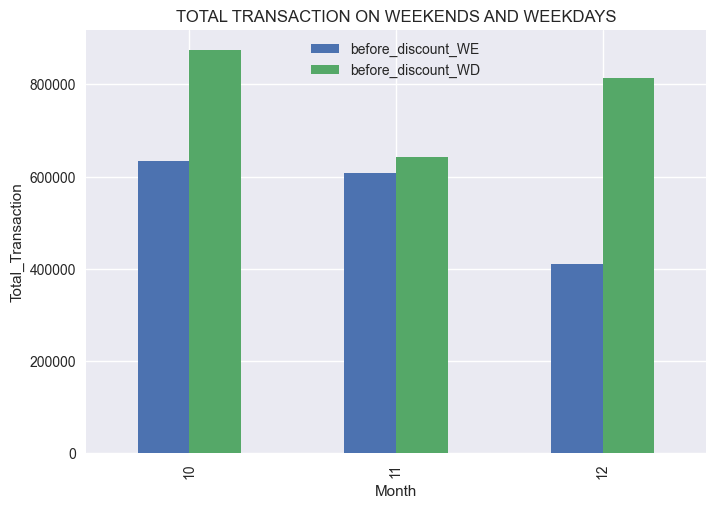

In [31]:

print(plt.style.available)
plt.style.use('seaborn-v0_8')

plot4A = df4A[['before_discount_WE','before_discount_WD']].plot(kind= 'bar')
plt.xlabel('Month')
plt.ylabel('Total_Transaction')
plt.title('TOTAL TRANSACTION ON WEEKENDS AND WEEKDAYS')
plt.show()

In [32]:
## 4.2
df4B = df4A[['before_discount_WE','before_discount_WD']].mean(numeric_only= True)
df4B

before_discount_WE    550884.561533
before_discount_WD    776708.850794
dtype: float64